In [33]:
# This project classifying the MNIST dataset of hand-written digits images using neural
# networks method.
# author: Jianrong Weng

import numpy as np
import time
import matplotlib.pyplot as plt


# loading data
train_images_np=np.load('./Project3_Data/MNIST_train_images.npy')
train_labels_np=np.load('./Project3_Data/MNIST_train_labels.npy')
val_images_np=np.load('./Project3_Data/MNIST_val_images.npy')
val_labels_np=np.load('./Project3_Data/MNIST_val_labels.npy')
test_images_np=np.load('./Project3_Data/MNIST_test_images.npy')
test_labels_np=np.load('./Project3_Data/MNIST_test_labels.npy')


def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

# loss function 
def CrossEntropy(y_hat,y):
    return -np.dot(y,np.log(y_hat))

# convert the parameter into a 10 by 1 vector
def onehot(input):
    Y = np.zeros((10,1))
    Y[input] = 1
    return Y


class MLP():

    def __init__(self):
        #Initialize all the parametres
        self.W1= np.random.normal(scale=0.1, size=(64, 784))
        self.b1= np.zeros([1, 64])
        self.W2= np.random.normal(scale=0.1,size=(10, 64))
        self.b2= np.zeros([1, 10])
        self.reset_grad()

    def reset_grad(self):
        self.W2_grad = 0
        self.b2_grad = 0
        self.W1_grad = 0
        self.b1_grad = 0

    def forward(self, x):
        #Feed data through the network
        self.x=x
        self.W1x= np.dot(self.W1, x)
        self.a1= self.W1x + self.b1
        self.f1= sigmoid(self.a1)
        self.W2x= np.dot(self.W2, self.f1.T)
        self.a2= self.W2x + self.b2.T
        self.y_hat= softmax(self.a2)
        return self.y_hat

    def update_grad(self,y):
        # Compute the gradients for the current observation y and add it to the gradient estimate over the entire batch
        dA2db2= 1
        dA2dW2= self.f1
        dA2dF1= self.W2
        dF1dA1= sigmoid_prime(self.a1)
        dA1db1= 1
        dA1dW1= self.x
        dLdA2 = (self.y_hat - y) * sigmoid_prime(self.a2) 
        dLdW2 = np.dot (dLdA2, dA2dW2) # derivatives
        dLdb2 = np.dot (dLdA2, dA2db2)
        dLdF1 = np.dot (dLdA2.T, dA2dF1) # new error
        dLdA1 = dLdF1 * dF1dA1 # new delta
        dA1dW1_reshape = dA1dW1.reshape(dA1dW1.shape[0], -1).T
        dLdW1 = np.dot (dLdA1.T, dA1dW1_reshape) # new derivatives
        dLdb1 = np.dot (dLdA1, dA1db1)
        self.W2_grad = self.W2_grad + dLdW2
        self.b2_grad = self.b2_grad + dLdb2
        self.W1_grad = self.W1_grad + dLdW1
        self.b1_grad = self.b1_grad + dLdb1

    def update_params(self,learning_rate):
        self.W2 = self.W2 - learning_rate * self.W2_grad
        self.b2 = self.b2 - learning_rate * self.b2_grad.reshape(-1)
        self.W1 = self.W1 - learning_rate * self.W1_grad
        self.b1 = self.b1 - learning_rate * self.b1_grad.reshape(-1)


<ipython-input-33-9cc663d8c285>:20: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


accuracy for the test dataset is : 0.945


In [ ]:
# ## Init the MLP
myNet=MLP()

# setting learning rate and number of epochs
learning_rate=1e-3
n_epochs=100

num_epochs = list(range(1, 101))

# The whole training process might takes up over ten minutes
accuracy_train1 = []
accuracy_val1 = []

# Training code for first 2000 images
for iter in range(n_epochs):
    mini_batches = [train_images_np[k:k+256] for k in range(0,2000, 256)]
    train_labels = [train_labels_np[k:k+256] for k in range(0,2000, 256)]
    # train network goes here
    for mini_batch, label in zip(mini_batches, train_labels):
        myNet.reset_grad()
        for i in range (len(mini_batch)):
            myNet.forward(mini_batch[i])
            myNet.update_grad(onehot(label[i]))
        myNet.update_params(learning_rate)
    
    result_labels = []
    val_labels = []
    for k in range (len(val_images_np)):
        val_label = myNet.forward(val_images_np[k])
        ans = 0
        for n in range(10):
            if val_label[n] > val_label[ans]: 
                ans = n
        val_labels.append(ans)
    for i in range (len(train_images_np[:2000])):
        result = myNet.forward(train_images_np[i])
        max = 0
        for m in range(10):
            if result[m] > result[max]:
                max = m
        result_labels.append(max)
    num_correct = 0
    num_correct_val = 0
    for j in range(len(result_labels)):
        if train_labels_np[j] == result_labels[j]:
            num_correct += 1
    for l in range(len(val_labels)):
        if val_labels_np[l] == val_labels[l]:
            num_correct_val += 1
    accuracy = num_correct/2000
    accuracy_val = num_correct_val / len(val_labels)
    accuracy_train1.append(accuracy)
    accuracy_val1.append(accuracy_val)
    

In [ ]:
###  Training code for all 50000 images
accuracy_train2 = []
accuracy_val2 = [] 

for iter in range(n_epochs):
    # using mini_batches method that breaks down 50,000 images into sub-array each with size of 256
    mini_batches = [train_images_np[k:k+256] for k in range(0,50000, 256)]
    train_labels = [train_labels_np[k:k+256] for k in range(0,50000, 256)]
    #training network
    for mini_batch, label in zip(mini_batches, train_labels):
        myNet.reset_grad()
        for i in range (len(mini_batch)):
            myNet.forward(mini_batch[i])
            myNet.update_grad(onehot(label[i]))
        myNet.update_params(learning_rate)
    
    
    result_labels = []
    val_labels = []
    # this double for loop calculate the number of correct prediction with validation dataset
    for k in range (len(val_images_np)):
        val_label = myNet.forward(val_images_np[k])
        ans = 0
        for n in range(10):
            if val_label[n] > val_label[ans]:
                ans = n
        val_labels.append(ans)
        
    # this double for loop calculate the number of correct prediction with training dataset
    for i in range (len(train_images_np)):
        result = myNet.forward(train_images_np[i])
        max = 0
        for m in range(10):
            if result[m] > result[max]:
                max = m
        result_labels.append(max)
    
    # calculating accuracy of validation dataset and test dataset
    num_correct = 0
    num_correct_val = 0
    for j in range(len(result_labels)):
        if train_labels_np[j] == result_labels[j]:
            num_correct += 1
    for l in range(len(val_labels)):
        if val_labels_np[l] == val_labels[l]:
            num_correct_val += 1
    accuracy = num_correct/len(result_labels)
    accuracy_val = num_correct_val / len(val_labels)
    accuracy_train2.append(accuracy)
    accuracy_val2.append(accuracy_val)

In [ ]:
# test the model we trained with test dataset to see how well it performs
accuracy_test = []
for iter in range(n_epochs):
    mini_batches = [train_images_np[k:k+256] for k in range(0,50000, 256)]
    train_labels = [train_labels_np[k:k+256] for k in range(0,50000, 256)]
    #train network goes here
    for mini_batch, label in zip(mini_batches, train_labels):
        myNet.reset_grad()
        for i in range (len(mini_batch)):
            myNet.forward(mini_batch[i])
            myNet.update_grad(onehot(label[i]))
        myNet.update_params(0.0005)
    #evaluate
    result_labels_test = []
    for i in range (len(test_images_np)):
        result = myNet.forward(test_images_np[i])
        max = 0
        for m in range(10):
            if result[m] > result[max]:
                max = m
        result_labels_test.append(max)
    
    num_correct = 0
    for j in range(len(result_labels_test)):
        if test_labels_np[j] == result_labels_test[j]:
            num_correct += 1
    accuracy = num_correct/len(result_labels_test)
    accuracy_test.append(accuracy)

print("accuracy for the test dataset is :", accuracy_test[99])

In [35]:
# You may uncomment this cell to save the weight of the netural network
# np.save('MLP_w1.npy', myNet.W1)
# np.save('MLP_w2.npy', myNet.W2)

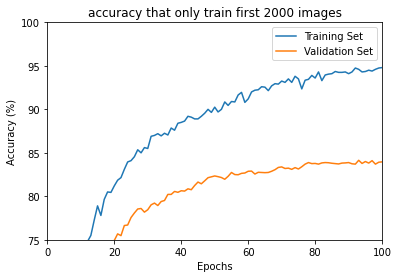

In [16]:
# visualize the accuracy by only training the network with the first 2000 images
plt.plot(num_epochs, [element * 100 for element in accuracy_train1], num_epochs, [element * 100 for element in accuracy_val1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 100, 20)
plt.ylim(75, 100)
plt.title('accuracy that only train first 2000 images')

plt.legend(['Training Set', 'Validation Set'])

plt.show()

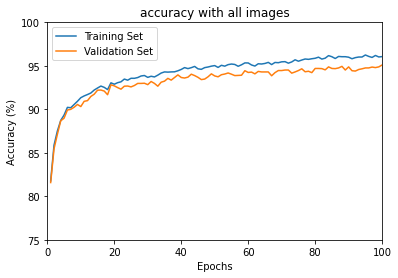

In [25]:
# visualize the accuracy by training all 50,000 images

plt.plot(num_epochs, [element * 100 for element in accuracy_train2], num_epochs, [element * 100 for element in accuracy_val2])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 100, 20)
plt.ylim(75, 100)
plt.title('accuracy with all images')

plt.legend(['Training Set', 'Validation Set'])

plt.show()

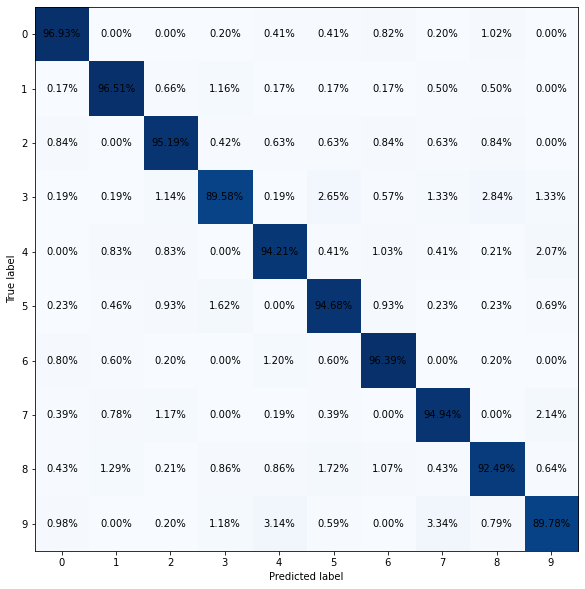

In [171]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] * 100
    fig, ax = plt.subplots(figsize=(10,10))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, (str("{:.2f}".format(matrix[i,j])) + "%"), ha="center", va="center")
    ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set(xticks=np.arange(matrix.shape[1]),
            yticks=np.arange(matrix.shape[0]),
            xticklabels=["0", "1","2","3","4","5","6","7","8","9"],
            yticklabels=["0", "1","2","3","4","5","6","7","8","9"],
            ylabel='True label',
            xlabel='Predicted label')
    plt.show()
plot_confusion_matrix(test_labels_np, result_labels_test)

In [36]:
import numpy as np
import time
import matplotlib.pyplot as plt



train_images_np=np.load('./Project3_Data/MNIST_train_images.npy')
train_labels_np=np.load('./Project3_Data/MNIST_train_labels.npy')
val_images_np=np.load('./Project3_Data/MNIST_val_images.npy')
val_labels_np=np.load('./Project3_Data/MNIST_val_labels.npy')
test_images_np=np.load('./Project3_Data/MNIST_test_images.npy')
test_labels_np=np.load('./Project3_Data/MNIST_test_labels.npy')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

learning_rate=1e-3

# def con_onehot(inputs):
#     labels = np.array([])
#     for label in inputs:
#         Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#         x = label.numpy()
#         Y[x] = 1
#         labels = np.append(labels, Y)
#     return torch.from_numpy(labels)

# def con_onehot(inputs):
#     Y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
#     x = inputs.numpy()
#     Y[x] = 1
    
#     Y = Y.reshape(Y.shape[0], -1).T
#     print(Y.shape)
#     return torch.from_numpy(Y)

# train = torch.Tensor(train_images_np)
# train = train.to(dtype=torch.long)
# val = torch.Tensor(val_images_np)
# val = val.to(dtype=torch.long)
# test = torch.Tensor(test_images_np)
# test = test.to(dtype=torch.long)

# train_labels = torch.Tensor(train_labels_np)
# train_labels = train_labels.to(dtype=torch.long)
# val_labels = torch.Tensor(val_labels_np)
# val_labels = val_labels.to(dtype=torch.long)
# test_labels = torch.Tensor(test_labels_np)
# test_labels = test_labels.to(dtype=torch.long)

# train2000 = torch.utils.data.TensorDataset(train[:2000],train_labels[:2000])
# trainData = torch.utils.data.TensorDataset(train,train_labels)
# valData = torch.utils.data.TensorDataset(val,val_labels)
# testData = torch.utils.data.TensorDataset(test,test_labels)

# loader = torch.utils.data.DataLoader(trainData, batch_size=256)
# loader2000 = torch.utils.data.DataLoader(train2000, batch_size=256)
# loader_val = torch.utils.data.DataLoader(valData, batch_size=256)
# loader_test = torch.utils.data.DataLoader(testData, batch_size=256)


class ConvNet(nn.Module):
    #From https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.view(-1,1,28,28))))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = ConvNet()    
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


In [30]:
cnn_train1_acc = []
cnn_val1_acc = []
# only train 2000 images
for epoch in range(100):  # loop over the dataset multiple times

    mini_batches = [train_images_np[k:k+256] for k in range(0,2000, 256)]
    train_labels = [train_labels_np[k:k+256] for k in range(0,2000, 256)]
    for mini_batch, label in zip(mini_batches, train_labels):
        optimizer.zero_grad()
        outputs = net(torch.Tensor(mini_batch))
        loss = criterion(outputs, torch.LongTensor(label))
        loss.backward()
        optimizer.step()


    cnn_labels_train1 = []
    cnn_labels_val1 = []
    for k in range (len(val_images_np)):
        val_label = net(torch.Tensor(val_images_np[k]))
        ans = 0
        for n in range (len(val_label[0])):
            if val_label[0][n] > val_label[0][ans]: 
                ans = n
        cnn_labels_val1.append(ans)
    for i in range (len(train_images_np[:2000])):
        result = net(torch.Tensor(train_images_np[i]))
        max = 0
        for m in range (len(result[0])):
            if result[0][m] > result[0][max]:
                max = m
        cnn_labels_train1.append(max)
    #print(cnn_labels_train1)
    num_correct = 0
    num_correct_val = 0
    for j in range(len(cnn_labels_train1)):
        if train_labels_np[j] == cnn_labels_train1[j]:
            num_correct += 1
    for j in range(len(cnn_labels_val1)):
        if val_labels_np[j] == cnn_labels_val1[j]:
            num_correct_val += 1
    accuracy = num_correct/2000
    cnn_train1_acc.append(accuracy)
    accuracy_val = num_correct_val/len(cnn_labels_val1)
    cnn_val1_acc.append(accuracy_val)


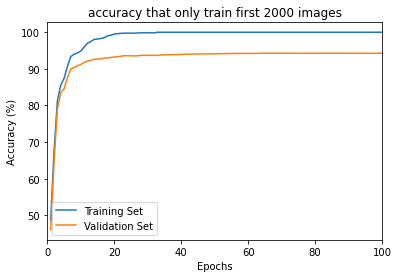

In [31]:
plt.plot(num_epochs, [element * 100 for element in cnn_train1_acc], num_epochs, [element * 100 for element in cnn_val1_acc])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 100, 20)
#plt.ylim(75, 100)
plt.title('accuracy that only train first 2000 images')

plt.legend(['Training Set', 'Validation Set'])

plt.show()

In [20]:
cnn_train2_acc = []
cnn_val2_acc = []
# only train 2000 images
for epoch in range(100):  # loop over the dataset multiple times

    mini_batches = [train_images_np[k:k+256] for k in range(0,50000, 256)]
    train_labels = [train_labels_np[k:k+256] for k in range(0,50000, 256)]
    for mini_batch, label in zip(mini_batches, train_labels):
        optimizer.zero_grad()
        outputs = net(torch.Tensor(mini_batch))
        loss = criterion(outputs, torch.LongTensor(label))
        loss.backward()
        optimizer.step()


    cnn_labels_train2 = []
    cnn_labels_val2 = []
    for k in range (len(val_images_np)):
        val_label = net(torch.Tensor(val_images_np[k]))
        ans = 0
        for n in range (len(val_label[0])):
            if val_label[0][n] > val_label[0][ans]: 
                ans = n
        cnn_labels_val2.append(ans)
    for i in range (len(train_images_np)):
        result = net(torch.Tensor(train_images_np[i]))
        max = 0
        for m in range (len(result[0])):
            if result[0][m] > result[0][max]:
                max = m
        cnn_labels_train2.append(max)
    num_correct = 0
    num_correct_val = 0
    for j in range(len(cnn_labels_train2)):
        if train_labels_np[j] == cnn_labels_train2[j]:
            num_correct += 1
    for j in range(len(cnn_labels_val2)):
        if val_labels_np[j] == cnn_labels_val2[j]:
            num_correct_val += 1
    accuracy = num_correct/ len(train_labels_np)
    cnn_train2_acc.append(accuracy)
    accuracy_val = num_correct_val/len(cnn_labels_val1)
    cnn_val2_acc.append(accuracy_val)

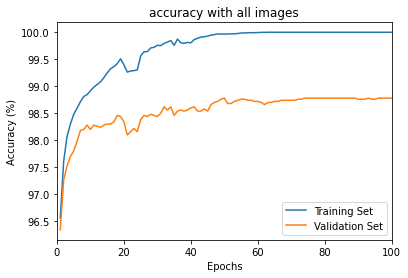

In [22]:
plt.plot(num_epochs, [element * 100 for element in cnn_train2_acc], num_epochs, [element * 100 for element in cnn_val2_acc])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0, 100, 20)
#plt.ylim(75, 100)
plt.title('accuracy with all images')

plt.legend(['Training Set', 'Validation Set'])

plt.show()

In [37]:
cnn_test_acc = []
for epoch in range(100):  # loop over the dataset multiple times

    mini_batches = [train_images_np[k:k+256] for k in range(0,50000, 256)]
    train_labels = [train_labels_np[k:k+256] for k in range(0,50000, 256)]
    # train 50000
    for mini_batch, label in zip(mini_batches, train_labels):
        optimizer.zero_grad()
        outputs = net(torch.Tensor(mini_batch))
        loss = criterion(outputs, torch.LongTensor(label))
        loss.backward()
        optimizer.step()

    # test testdataset
    cnn_labels_test = []
    for k in range (len(test_images_np)):
        test_label = net(torch.Tensor(test_images_np[k]))
        ans = 0
        for n in range (len(test_label[0])):
            if test_label[0][n] > test_label[0][ans]: 
                ans = n
        cnn_labels_test.append(ans)
    # calculate accuracy
    num_correct = 0
    for j in range(len(cnn_labels_test)):
        if test_labels_np[j] == cnn_labels_test[j]:
            num_correct += 1
    accuracy = num_correct/ len(test_labels_np)
    cnn_test_acc.append(accuracy)
print("accuracy for the test dataset is :", cnn_test_acc[99])

accuracy for the test dataset is : 0.986


In [40]:
torch.save(net.state_dict(), "cnn_dict_model")

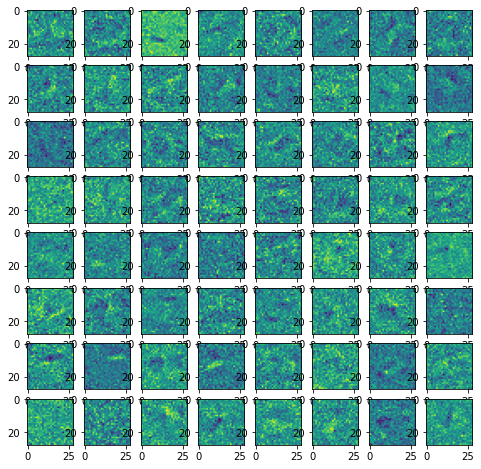

In [70]:
fig=plt.figure(figsize=(8, 8))
for i in range (len(myNet.W1)):
    img = (myNet.W1[i].reshape(myNet.W1[i].shape[0], -1).T)
    img = np.reshape(img, (28,28))
    fig.add_subplot(8, 8, i+1)
    plt.imshow(img)
plt.show()